### Custom data loading practice

In [8]:
import matplotlib.pyplot as plt

In [58]:
# !pip install pillow

In [6]:
from PIL import Image

In [60]:
img= Image.open("dataset/mnist_train/0.png")
img

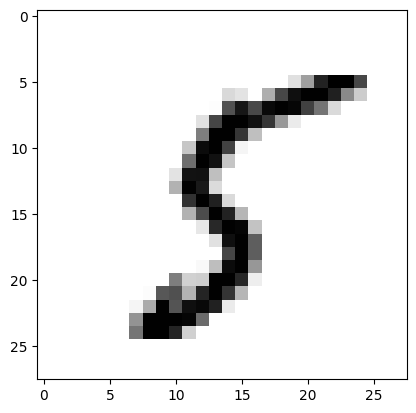

In [61]:
plt.imshow(img, cmap='binary')

In [7]:
import numpy as np

In [63]:
img_array=np.array(img)
print("Dimnesions: ",img_array.shape)

Dimnesions:  (28, 28)


In [8]:
import pandas as pd

In [65]:
train_data=pd.read_csv("dataset/mnist_train.csv")
valid_data=pd.read_csv("dataset/mnist_valid.csv")
test_data=pd.read_csv("dataset/mnist_test.csv")
print("training data:",train_data.shape ,"\n",train_data.head())
print("Validating data:",valid_data.shape ,"\n",valid_data.head())
print("Test data:",test_data.shape ,"\n",test_data.head())



training data: (256, 2) 
    Class Label File Name
0            5     0.png
1            8     1.png
2            8     2.png
3            0     3.png
4            9     4.png
Validating data: (256, 2) 
    Class Label File Name
0            0   256.png
1            8   257.png
2            7   258.png
3            4   259.png
4            7   260.png
Test data: (256, 2) 
    Class Label File Name
0            4   512.png
1            0   513.png
2            6   514.png
3            8   515.png
4            4   516.png


### Using helper function for loading and training

In [1]:
from resources.helper.helper_dataset import get_dataloaders
from resources.helper.helper_evaluation import set_all_seeds, set_deterministic
from resources.helper.helper_train import train_model
from resources.helper.helper_plotting import plot_training_loss, plot_accuracy, show_examples

import torch
# import numpy as np
# import matplotlib.pyplot as plt

In [2]:
Batch_size=32

In [3]:
train_loader, valid_loader, test_loader = get_dataloaders(img_dir="dataset/",csv_dir="dataset/",batch_size=Batch_size)
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Class labels of 10 examples: tensor([7, 5, 7, 1, 8, 1, 9, 7, 6, 7])


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [5]:
class MLP(torch.nn.Module):

    def __init__(self, num_features, num_hidden, num_classes):
        super().__init__()
        
        self.num_classes = num_classes
        
        self.model = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden),
            torch.nn.Sigmoid(),
            torch.nn.Linear(num_hidden, num_classes))

    def forward(self, x):
        return self.model(x)

    
torch.manual_seed(42)
model = MLP(num_features=28*28,
            num_hidden=100,
            num_classes=10)

model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [6]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=100,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=device)

Epoch: 001/100 | Batch 0000/0008 | Loss: 2.3525
Epoch: 001/100 | Train: 14.06% | Validation: 10.16%
Time elapsed: 0.01 min
Epoch: 002/100 | Batch 0000/0008 | Loss: 2.2886
Epoch: 002/100 | Train: 14.06% | Validation: 10.16%
Time elapsed: 0.01 min
Epoch: 003/100 | Batch 0000/0008 | Loss: 2.1876
Epoch: 003/100 | Train: 13.67% | Validation: 7.81%
Time elapsed: 0.01 min
Epoch: 004/100 | Batch 0000/0008 | Loss: 2.2527
Epoch: 004/100 | Train: 34.77% | Validation: 23.44%
Time elapsed: 0.02 min
Epoch: 005/100 | Batch 0000/0008 | Loss: 2.1856
Epoch: 005/100 | Train: 26.17% | Validation: 19.14%
Time elapsed: 0.02 min
Epoch: 006/100 | Batch 0000/0008 | Loss: 2.1166
Epoch: 006/100 | Train: 41.80% | Validation: 30.47%
Time elapsed: 0.03 min
Epoch: 007/100 | Batch 0000/0008 | Loss: 2.1036
Epoch: 007/100 | Train: 36.72% | Validation: 23.83%
Time elapsed: 0.03 min
Epoch: 008/100 | Batch 0000/0008 | Loss: 2.1080
Epoch: 008/100 | Train: 46.48% | Validation: 31.25%
Time elapsed: 0.03 min
Epoch: 009/100 | 

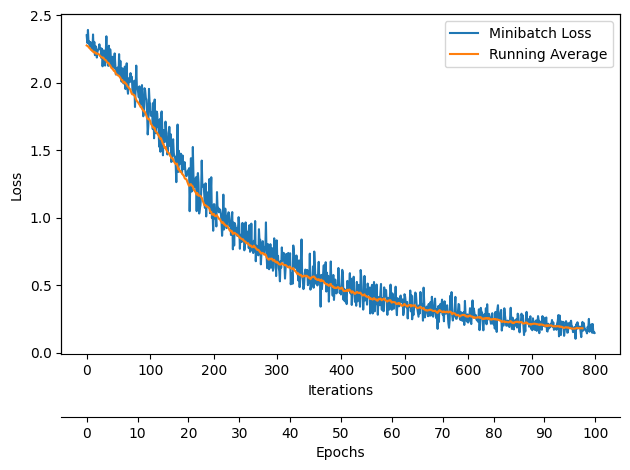

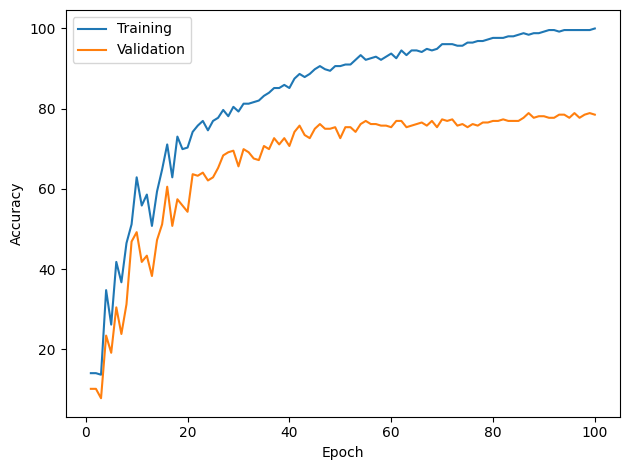

In [9]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=100,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.show()

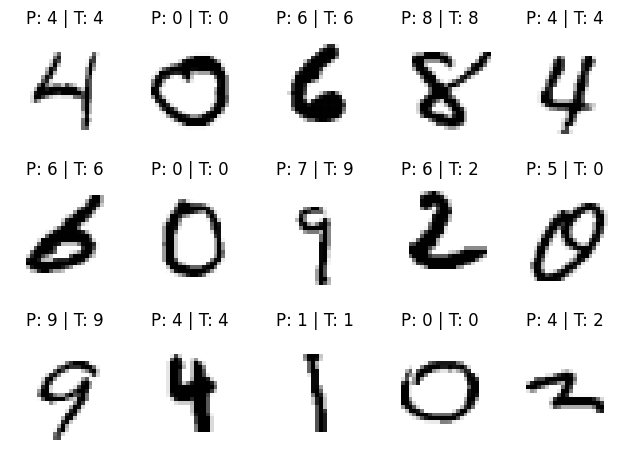

In [12]:
show_examples(model=model, data_loader=test_loader)